In [1]:
import h5py   
import matplotlib.pyplot as plt
import numpy as np

In [2]:
def load_h5_tracer(fdir,tracer_name,step,KL):
    """
    load the data of the passive tracer from h5 file
    -----------
    Input:
    fdir   : *Str*, input file dir 
    tracer_name : *Str*, name of tracer
    number : *Int*, the number of file
    -----------
    Output:
    coord : *Np.array*
    data  : *Np.array*  
    label : *str*
    """
    fname = fdir+tracer_name +str(step).zfill(4)+".h5"
    fh5   = h5py.File(fname ,'r')  
    fdata = fh5["data"][()]
    xcoord = fdata[:,0]*KL #km
    ycoord = (fdata[:,1]*KL-700)*1000 #m
    return xcoord,ycoord

### "no voronoi" vs "with voronoi" (dt = 2.5 ka)

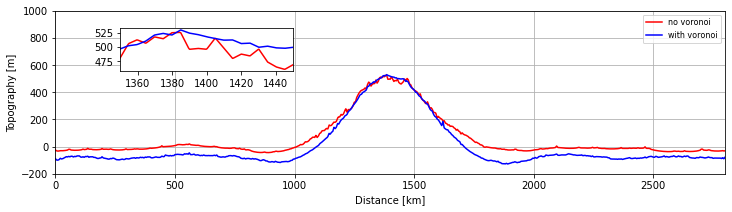

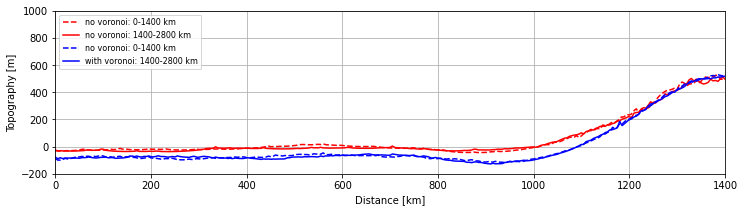

In [3]:
### Different boundary conditions at bottom
tracer_name = "surfaceSwarm"
step = 1600
dt = 2.5 # [ka]
KL = 850 # [km]
fdir0 = "Crameri2012Case2_noVo_2.5ka/"
fdir1 = "Crameri2012Case2_withVo_2.5ka/"

xcoord0,ycoord0 = load_h5_tracer(fdir0,tracer_name,step,KL)
xcoord1,ycoord1 = load_h5_tracer(fdir1,tracer_name,step,KL)

fname = "Topography at "+ str(step*dt/1000) + " Ma_noVo&withVo_2.5ka.png"
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set(xlabel='Distance [km]', ylabel='Topography [m]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(xcoord0,ycoord0,"r",label="no voronoi")
ax.plot(xcoord1,ycoord1,"b",label="with voronoi")
ax.legend(loc = 'upper right',prop = {'size':8})
ax.set_xlim([0,2800]) 
ax.set_ylim([-200,1000]) 
ax.grid()


left,bottom,width,height=0.2,0.6,0.2,0.2 
ax2=fig.add_axes([left,bottom,width,height])
#ax2.set(xlabel='Distance [km]', ylabel='Topography [m]') 
ax2.plot(xcoord0[2400:2600],ycoord0[2400:2600],"r")
ax2.plot(xcoord1[2400:2600],ycoord1[2400:2600],"b")
ax2.set_xlim([1350,1450]) 
#ax2.set_ylim([400,500]) 
plt.savefig(fname,dpi=150,bbox_inches='tight')


fname = "Symmetry of the topography at "+ str(step*dt/1000) + " Ma_noVo&withVo_2.5ka.png"
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set(xlabel='Distance [km]', ylabel='Topography [m]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(xcoord0[:2500],ycoord0[:2500],"--r",label="no voronoi: 0-1400 km")
ax.plot(xcoord0[:2500],ycoord0[2500:][::-1],"r",label="no voronoi: 1400-2800 km")

ax.plot(xcoord1[:2500],ycoord1[:2500],"--b",label="no voronoi: 0-1400 km")
ax.plot(xcoord1[:2500],ycoord1[2500:][::-1],"b",label="with voronoi: 1400-2800 km")
ax.legend(loc = 'upper left',prop = {'size':8})
ax.set_xlim([0,1400]) 
ax.set_ylim([-200,1000]) 
ax.grid()
plt.savefig(fname,dpi=150,bbox_inches='tight')

### "dt = 2.5 ka" vs "dt =5 ka" (with voronoi)

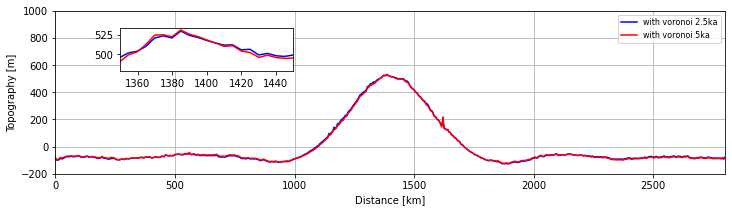

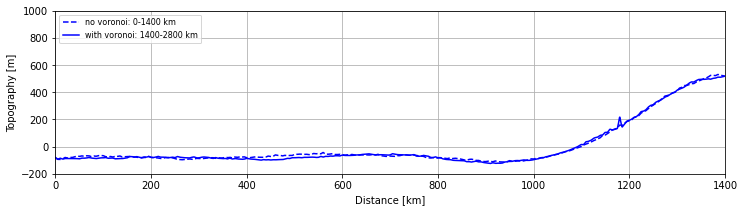

In [4]:
### Different boundary conditions at bottom
tracer_name = "surfaceSwarm"
step0 = 1600
step1 = 800
dt0 = 2.5 # [ka]
dt1 = 5 # [ka]
KL = 850 # [km]
fdir0 = "Crameri2012Case2_withVo_2.5ka/"
fdir1 = "Crameri2012Case2_withVo_5ka/"

xcoord0,ycoord0 = load_h5_tracer(fdir0,tracer_name,step0,KL)
xcoord1,ycoord1 = load_h5_tracer(fdir1,tracer_name,step1,KL)

fname = "Topography at "+ str(step0*dt0/1000) + " Ma_withVo5ka&2.5ka.png"
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set(xlabel='Distance [km]', ylabel='Topography [m]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(xcoord0,ycoord0,"b",label="with voronoi 2.5ka")
ax.plot(xcoord1,ycoord1,"r",label="with voronoi 5ka")
ax.legend(loc = 'upper right',prop = {'size':8})
ax.set_xlim([0,2800]) 
ax.set_ylim([-200,1000]) 
ax.grid()

left,bottom,width,height=0.2,0.6,0.2,0.2 
ax2=fig.add_axes([left,bottom,width,height])
#ax2.set(xlabel='Distance [km]', ylabel='Topography [m]') 
ax2.plot(xcoord0[2400:2600],ycoord0[2400:2600],"b")
ax2.plot(xcoord1[2400:2600],ycoord1[2400:2600],"r")
ax2.set_xlim([1350,1450]) 
#ax2.set_ylim([400,500]) 
plt.savefig(fname,dpi=150,bbox_inches='tight')



fname = "Symmetry of the topography at "+ str(step*dt/1000) + " Ma_withVo5ka&2.5ka.png"
fig, ax = plt.subplots(1, 1, figsize=(12,3))
ax.set(xlabel='Distance [km]', ylabel='Topography [m]') #,xticks=xticks_fig,yticks=yticks_fig,title=fname_fig)
ax.plot(xcoord1[:2500],ycoord1[:2500],"--b",label="no voronoi: 0-1400 km")
ax.plot(xcoord1[:2500],ycoord1[2500:][::-1],"b",label="with voronoi: 1400-2800 km")
ax.legend(loc = 'upper left',prop = {'size':8})
ax.set_xlim([0,1400]) 
ax.set_ylim([-200,1000]) 
ax.grid()
plt.savefig(fname,dpi=150,bbox_inches='tight')